In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [27]:
df=pdr.get_data_fred('FEDFUNDS')

In [28]:
df.head(10)

,FEDFUNDS
DATE,
2019-03-01,2.41
2019-04-01,2.42
2019-05-01,2.39
2019-06-01,2.38
2019-07-01,2.40
2019-08-01,2.13
2019-09-01,2.04
2019-10-01,1.83
2019-11-01,1.55


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-03-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


In [30]:
df.index

DatetimeIndex(['2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
      

In [31]:
df.index.freq='MS'

In [32]:
df.index

DatetimeIndex(['2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
      

<Axes: xlabel='DATE'>

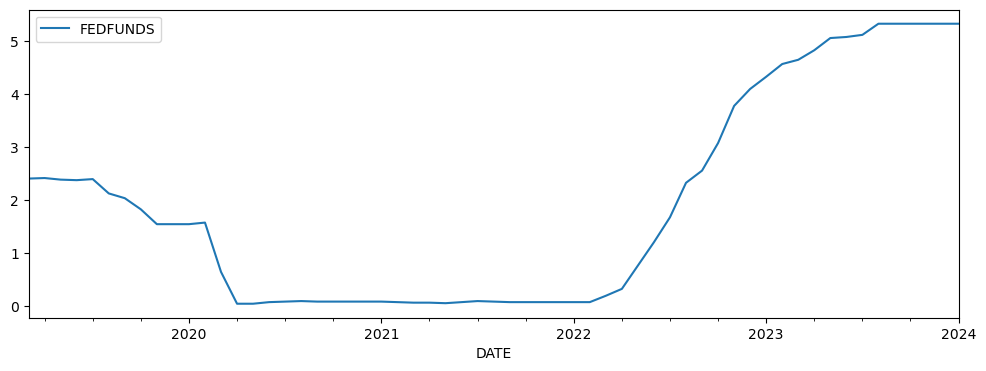

In [33]:
df.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

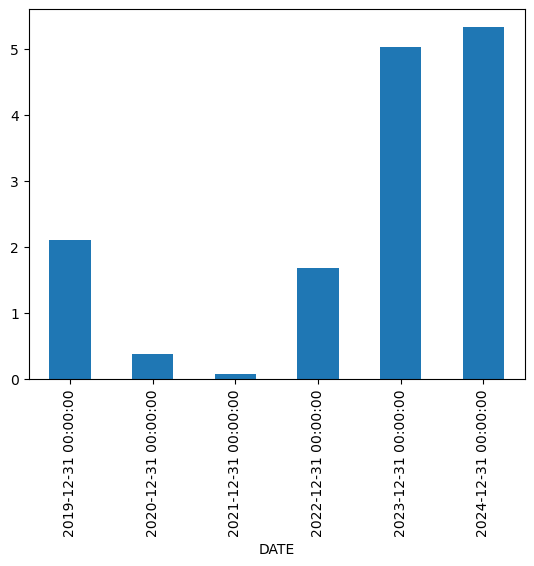

In [34]:
df['FEDFUNDS'].resample('A').mean().plot(kind='bar')

<Axes: xlabel='DATE'>

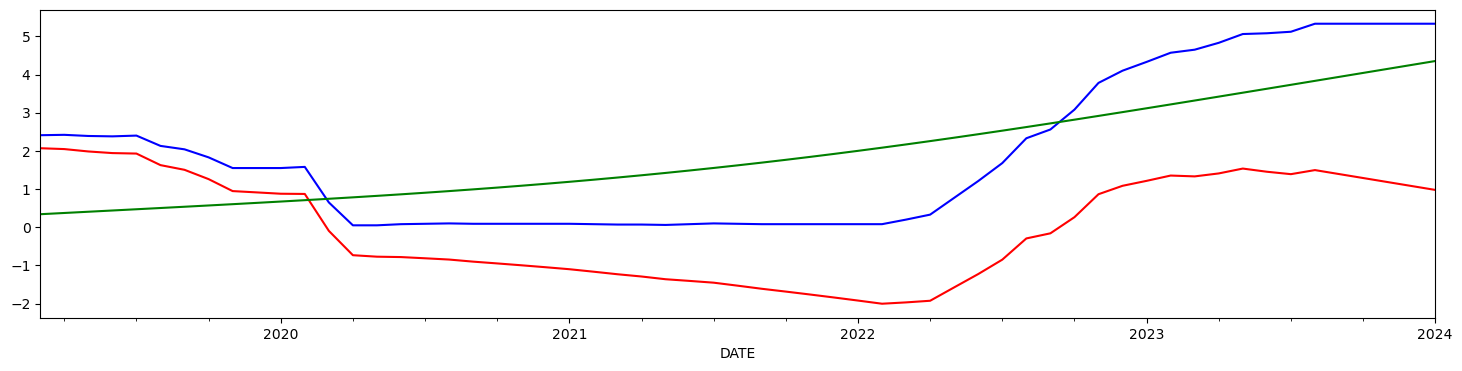

In [35]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cyclic_component,trend_component = hpfilter(df['FEDFUNDS'],lamb = 129600)
df['FEDFUNDS'].plot(figsize =(18,4),color ='blue')
cyclic_component.plot(figsize =(18,4),color ='red')
trend_component.plot(figsize =(18,4),color ='green')

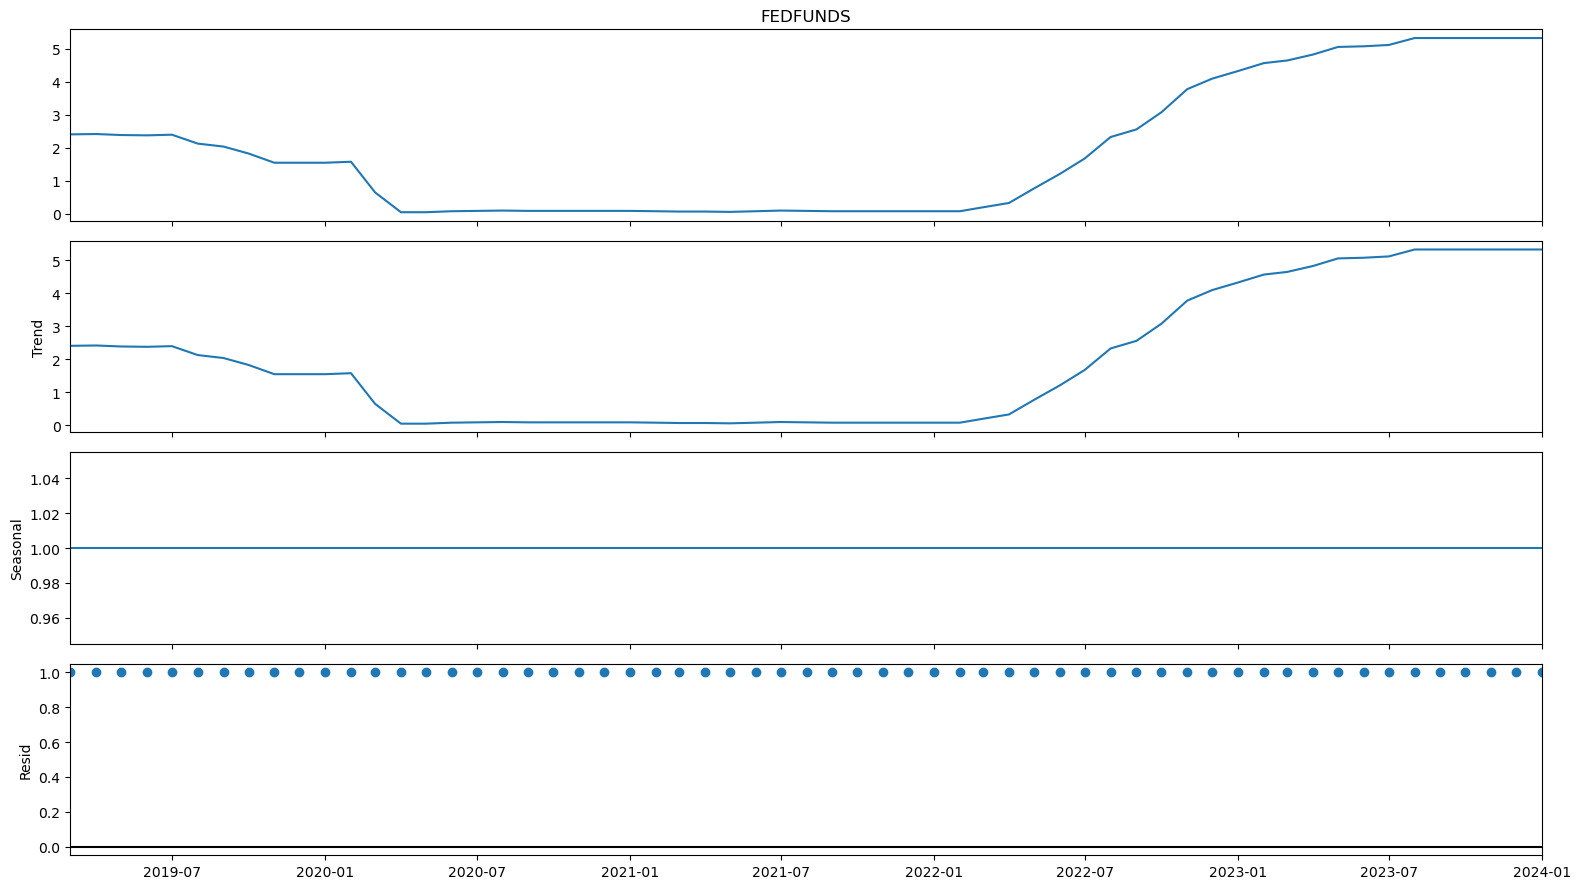

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['FEDFUNDS'],period=1, model='multiplicative')
fig = result.plot();
fig.set_size_inches((16, 9))
fig.tight_layout()

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

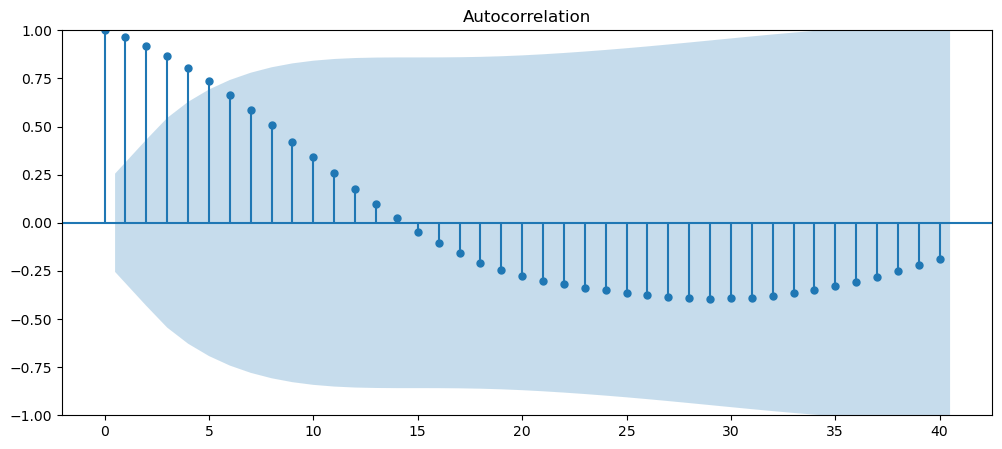

In [38]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(df['FEDFUNDS'],lags=40,ax=ax);

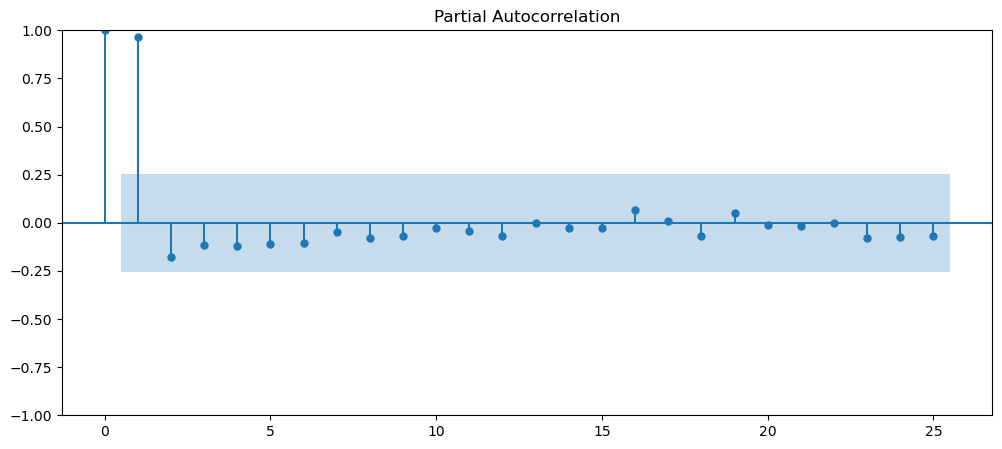

In [45]:
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(df['FEDFUNDS'],lags=25,ax=ax);

In [46]:
from pmdarima import auto_arima

# Assuming 'values' is the column you want to use for time series forecasting
values = df['FEDFUNDS']

# Perform auto_arima on the numerical values
stepwise_fit = auto_arima(values, trace=True, suppress_warnings=True)

# Print the summary of the fitted model
print(stepwise_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-23.772, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-17.812, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-17.939, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-22.330, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-25.706, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-25.842, Time=0.01 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-25.201, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-23.440, Time=0.12 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-23.791, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-23.884, Time=0.03 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.328 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(0, 2, 2)   Log Likelihood                  

In [47]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
train=df.iloc[:40]
test=df.iloc[40:]
print(train.shape,test.shape)

(40, 2) (19, 2)


In [49]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train['FEDFUNDS'], order=(0, 2, 2))
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               FEDFUNDS   No. Observations:                   40
Model:                 ARIMA(0, 2, 2)   Log Likelihood                   9.493
Date:                Tue, 13 Feb 2024   AIC                            -12.985
Time:                        01:10:53   BIC                             -8.072
Sample:                    03-01-2019   HQIC                           -11.237
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3452      0.284     -1.217      0.224      -0.901       0.211
ma.L2         -0.4374      0.182     -2.409      0.016      -0.793      -0.081
sigma2         0.0347      0.004      8.564      0.0

In [57]:
# Get the parameters of the trained model
params = model_fit.params

# Predict using the ARIMA model
pred = model_fit.predict(start=40, end=58, typ='levels', params=params).rename('ARIMA Predictions')

/Users/simantinighosh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ', 'params']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [58]:
pred.shape


(19,)

<Axes: xlabel='DATE'>

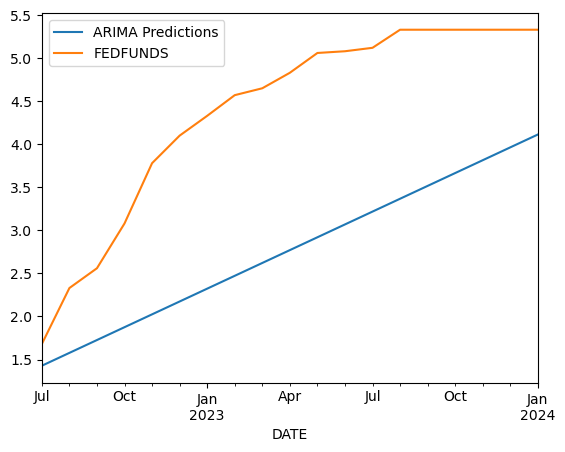

In [59]:
pred.plot(legend=True)
test['FEDFUNDS'].plot(legend=True)

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['FEDFUNDS'].mean()
rmse=sqrt(mean_squared_error(pred,test['FEDFUNDS']))
print(rmse)

1.6883476554902808
